<a href="https://colab.research.google.com/github/caltunay/for_fun_EDAs/blob/master/kardashians_for_no_good_reason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Load pandas
import pandas as pd

# Read in dataset
trends = pd.read_csv('/content/drive/My Drive/Colab Notebooks/For fun EDAs/trends_kj_sisters.csv')

# Inspect data
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [4]:
# Make column names easier to work with
trends.columns = ["month", "kim", "khloe", "kourtney", "kendall", "kylie"]

# Inspect data
trends.head()

,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [5]:
# Inspect data types
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null object
kourtney    147 non-null object
kendall     147 non-null object
kylie       147 non-null int64
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


In [6]:
# Loop through columns
for i in trends.columns:

    # modify columns that have the "<" sign
    if "<" in trends[i].to_string():
        # Remove "<" and convert dtype to integer
        trends[i] = pd.to_numeric(trends[i].str.replace('<',""))

        
        
# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendall     147 non-null int64
kylie       147 non-null int64
dtypes: int64(5), object(1)
memory usage: 7.0+ KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,2
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,2


In [7]:
# Convert month to type datetime
trends['month'] = pd.to_datetime(trends['month'])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null datetime64[ns]
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendall     147 non-null int64
kylie       147 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.0 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,2
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,2


In [8]:
# Set month as DataFrame index
trends = trends.set_index('month')

# Inspect the data
trends.head()

,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,2
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,2


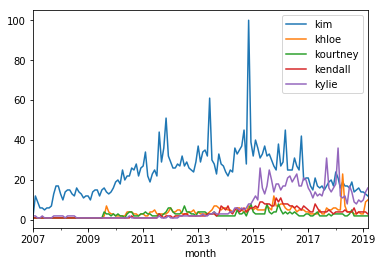

In [9]:
# Plot search interest vs. month
%matplotlib inline

trends.plot()

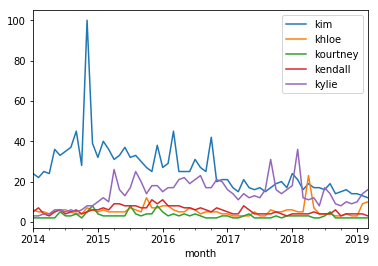

In [10]:
# Zoom in from January 2014
trends.loc['2014-01':'2019-03'].plot()

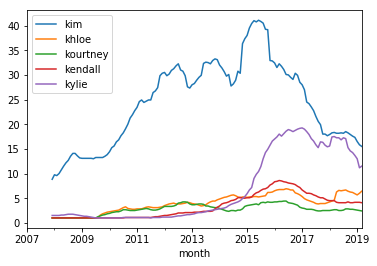

In [11]:
# Smooth the data with rolling means

trends.rolling(window = 12).mean().plot()

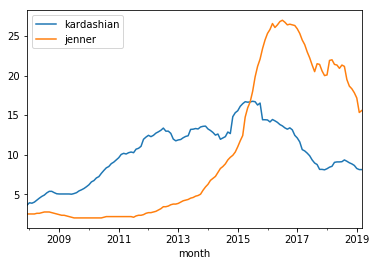

In [12]:
# Average search interest for each family line
# trends['kardashian'] =

trends['kardashian'] = (trends['kim'] + trends['khloe'] + trends['kourtney'])/3
trends['jenner'] = trends['kendall'] + trends['kylie']

# Plot average family line search interest vs. month
trends[['kardashian','jenner']].rolling(window = 12).mean().dropna().plot()